In [229]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [230]:
edu2012 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2012.csv', sep=';', engine='python', encoding = 'utf8')
edu2013 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2013.csv', sep=';', engine='python', encoding = 'utf8')
edu2014 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2014.csv', sep=';', engine='python', encoding = 'utf8')
edu2015 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2015.csv', sep=';', engine='python', encoding = 'utf8')
edu2016 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2016.csv', sep=';', engine='python', encoding = 'utf8')
edu2017 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2017.csv', sep=';', engine='python', encoding = 'utf8')
edu2018 = pd.read_csv(r'..\Dados\USP-Educação\Orcamento_2018.csv', sep=';', engine='python', encoding = 'utf8')
edu2012["Ano"] = 2012
edu2013["Ano"] = 2013
edu2014["Ano"] = 2014
edu2015["Ano"] = 2015
edu2016["Ano"] = 2016
edu2017["Ano"] = 2017
edu2018["Ano"] = 2018

In [231]:
frames = [edu2012, edu2013, edu2014, edu2015, edu2016, edu2017, edu2018]
df_edu = pd.concat(frames, sort=False)

new = df_edu["Unidade de Despesa"].str.split("- ", n = 1, expand = True)
df_edu['Codigo'] = new[0]
df_edu['Unidade'] = new[1]
cols = list(df_edu.columns.values)
cols = cols[-2:] + cols[:-2]
df_edu = df_edu[cols]
df_edu = df_edu.drop(labels='Unidade de Despesa' , axis=1)
df_edu['Tipo'] = 'Educação'

In [232]:
saude2012 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2012.csv', sep=';', engine='python', encoding = 'utf8')
saude2013 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2013.csv', sep=';', engine='python', encoding = 'utf8')
saude2014 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2014.csv', sep=';', engine='python', encoding = 'utf8')
saude2015 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2015.csv', sep=';', engine='python', encoding = 'utf8')
saude2016 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2016.csv', sep=';', engine='python', encoding = 'utf8')
saude2017 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2017.csv', sep=';', engine='python', encoding = 'utf8')
saude2018 = pd.read_csv(r'..\Dados\USP-Saúde\Orcamento_2018.csv', sep=';', engine='python', encoding = 'utf8')
saude2012["Ano"] = 2012
saude2013["Ano"] = 2013
saude2014["Ano"] = 2014
saude2015["Ano"] = 2015
saude2016["Ano"] = 2016
saude2017["Ano"] = 2017
saude2018["Ano"] = 2018

In [233]:
frames = [saude2012, saude2013, saude2014, saude2015, saude2016, saude2017, saude2018]
df_saude = pd.concat(frames, sort=False)

new = df_saude["Unidade de Despesa"].str.split("- ", n = 1, expand = True)
df_saude['Codigo'] = new[0]
df_saude['Unidade'] = new[1]
cols = list(df_saude.columns.values)
cols = cols[-2:] + cols[:-2]
df_saude = df_saude[cols]
df_saude = df_saude.drop(labels='Unidade de Despesa' , axis=1)
df_saude['Tipo'] = 'Saude'

In [234]:
frames = [df_edu, df_saude]
df = pd.concat(frames, sort=False)
df = df.sort_values(by=['Codigo', 'Ano', 'Tipo'])

In [235]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")
df.columns = df.columns.str.replace("$", "eais")
df.Liquidado_Reais = df.Liquidado_Reais.str.replace(",", ".")

In [236]:
df.Liquidado_Reais = pd.to_numeric(df.Liquidado_Reais)

In [237]:
new = df["Elemento"].str.split("- ", n = 1, expand = True)
df["Elemento"] = new[1]

In [279]:
df.head()

,Codigo,Unidade,Grupo_Orçamentário,Fonte_de_Recurso,Subfunção,Programa,Ação,Elemento,Dotação_Inicial_Reais,Dotação_Atual_Reais,Empenhado_Reais,Liquidado_Reais,Pago_Reais,Pago_Restos_Reais,Ano,Tipo
22083,1,Reitoria da Universidade de São Paulo,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Auxílio - Creche e Auxílio Escola,"0,00","0,00","0,00",0.00,"0,00","3991,85",2012,Educação
22084,1,Reitoria da Universidade de São Paulo,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Diárias Pessoal Civil,"0,00","0,00","0,00",0.00,"0,00","0,00",2012,Educação
22085,1,Reitoria da Universidade de São Paulo,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Gêneros Alimentícios,"0,00","35280,47","35280,47",35280.47,"31280,47","2000,00",2012,Educação
22086,1,Reitoria da Universidade de São Paulo,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Material de Construção,"0,00","485,23","485,23",485.23,"485,23","0,00",2012,Educação
22087,1,Reitoria da Universidade de São Paulo,0 - Básica,1 - Tesouro,122 - Administração Geral,100 - Suporte Administrativo,5272 - Apoio Técnico Administrativo,Suprimentos de Informática,"0,00","26512,94","26512,94",26096.69,"20389,91","843,86",2012,Educação


In [278]:
gastos = df.groupby(['Elemento'])["Liquidado_Reais"].agg("sum").sort_values(ascending=False)
gastos = gastos[gastos > 0]
gastos

Elemento
Vencimentos e Vantagens Fixas - Pessoal Civil    1.335431e+10
Obrigações Patronais                             8.268927e+09
Outros Serviços de Terceiros - PJ                2.536978e+09
Pessoal Civil - Pago pela Unidade                1.011039e+09
Serviços Limpeza, Vigilância e Outros - PJ       8.994042e+08
Contr.do Est.Cob.de Insuf.Fin.do Sist.Previde    5.635676e+08
Material de Consumo                              5.586702e+08
Indenizações e restituições Trabalhistas         5.341685e+08
Serviços de Utilidade Pública                    4.488140e+08
Outros Serviços de Terceiros - Pessoa Física     2.922483e+08
Obrigações Tributárias e Contributivas           2.650210e+08
Previdência Social - Pessoal CLT                 2.568982e+08
Equipamentos e Material Permanente               2.436430e+08
Obras e instalações                              2.091688e+08
Contrib.Patr. à São Paulo Previdência SPPREV     2.091380e+08
Auxílio Financeiro a Estudantes                  2.089150e+08

In [272]:
gastos[20:].sum()

1510567767.09

In [281]:
gastos_unidade = df.groupby(['Unidade'])["Liquidado_Reais"].agg("sum").sort_values(ascending=False)
gastos_unidade

Unidade
Reitoria da Universidade de São Paulo                                     2.000349e+10
Reitoria - Administração Geral                                            7.975996e+09
Hospital Universitário                                                    3.299681e+08
Superintendência do Espaço Físico                                         2.710905e+08
Superintendência de Assistência Social                                    2.363037e+08
Faculdade de Medicina de Ribeirão Preto                                   1.598225e+08
Prefeitura do Campus USP da Capital                                       1.400892e+08
Prefeitura do Campus USP de Ribeirão Preto                                1.241434e+08
Assistência Médica e Odontológica                                         1.200195e+08
Escola Politécnica                                                        1.133253e+08
Superintendência de Tecnologia da Informação                              1.092239e+08
Hospital de Reabilitação de Anomali

In [284]:
gastos_unidade.to_csv('Gastos_Unidades.csv', encoding = 'utf8')

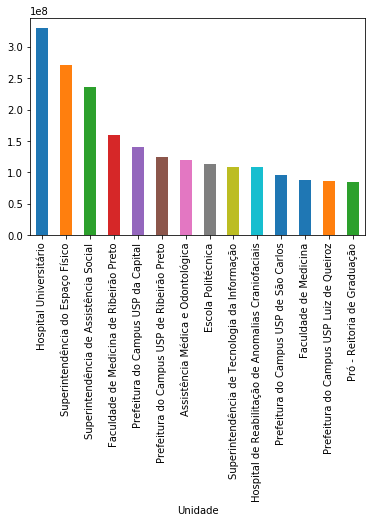

In [293]:
gastos_unidade[2:16].plot(kind='bar')